In [1]:
# Importing required libraries

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Will import machine learning libraries on the go

## Exploratory Data Analysis (EDA)

I have moved all data files into one single folder for ease in analysis.

In [2]:
# Importing train and test data
train_df = pd.read_csv("data/sales_train.csv")
test_df = pd.read_csv("data/test_data.csv")

In [3]:
train_df.head()

,outletCode,invoice_date,itemCode,sales_in_litres
0,customer_id_1,20/11/2019,sku_id_51,44.0
1,customer_id_2,13/04/2019,sku_id_51,22.0
2,customer_id_5,06/04/2019,sku_id_51,22.0
3,customer_id_5,07/05/2019,sku_id_51,22.0
4,customer_id_5,01/06/2019,sku_id_51,22.0


In [4]:
test_df.head()

,outletCode,invoice_date,itemCode,actual_sales_in_litres,predicted_sales_in_litres
0,customer_id_10,12/10/2019,sku_id_48,5,NaN
1,customer_id_10,14/12/2019,sku_id_53,5,NaN
2,customer_id_10,08/01/2020,sku_id_48,5,NaN
3,customer_id_1000,21/10/2020,sku_id_14,4,NaN
4,customer_id_1000,21/10/2020,sku_id_11,12,NaN


### **Removing `predicted_sales_in_litres` from `test_df` for now.**

In [5]:
test_df_actual = test_df.drop("predicted_sales_in_litres", axis=1)

In [6]:
# Checking for missing values in train and test data
train_df.isna().sum()

outletCode         0
invoice_date       0
itemCode           0
sales_in_litres    0
dtype: int64

In [7]:
test_df_actual.isna().sum()

outletCode                0
invoice_date              0
itemCode                  0
actual_sales_in_litres    0
dtype: int64

**Hence there are no missing values in both datasets.**

In [8]:
# Checking Datatypes
train_df.dtypes

outletCode          object
invoice_date        object
itemCode            object
sales_in_litres    float64
dtype: object

In [9]:
test_df_actual.dtypes

outletCode                object
invoice_date              object
itemCode                  object
actual_sales_in_litres     int64
dtype: object

**Here `invoice_date` column is showing as `object` datatype but it should be `datetime`.**

In [10]:
# Changing the datatype of invoice_date
train_df["invoice_date"] = pd.to_datetime(train_df["invoice_date"],
                                      format='%d/%m/%Y')

test_df_actual["invoice_date"] = pd.to_datetime(test_df_actual["invoice_date"],
                                      format='%d/%m/%Y')

In [11]:
train_df.head()

,outletCode,invoice_date,itemCode,sales_in_litres
0,customer_id_1,2019-11-20,sku_id_51,44.0
1,customer_id_2,2019-04-13,sku_id_51,22.0
2,customer_id_5,2019-04-06,sku_id_51,22.0
3,customer_id_5,2019-05-07,sku_id_51,22.0
4,customer_id_5,2019-06-01,sku_id_51,22.0


In [12]:
test_df_actual.head()

,outletCode,invoice_date,itemCode,actual_sales_in_litres
0,customer_id_10,2019-10-12,sku_id_48,5
1,customer_id_10,2019-12-14,sku_id_53,5
2,customer_id_10,2020-01-08,sku_id_48,5
3,customer_id_1000,2020-10-21,sku_id_14,4
4,customer_id_1000,2020-10-21,sku_id_11,12


**The `invoice_date` column values are not in order.**

In [13]:
# Sorting the invoice_date column
train_df.sort_values(by=["invoice_date"], inplace=True, ignore_index=True)
train_df.head()

,outletCode,invoice_date,itemCode,sales_in_litres
0,customer_id_2744,2019-01-01,sku_id_17,16.0
1,customer_id_1266,2019-01-01,sku_id_14,24.0
2,customer_id_766,2019-01-01,sku_id_15,5.0
3,customer_id_1999,2019-01-01,sku_id_11,12.0
4,customer_id_1048,2019-01-01,sku_id_60,12.0


In [14]:
test_df_actual.sort_values(by=["invoice_date"], inplace=True, ignore_index=True)
test_df_actual.head()

,outletCode,invoice_date,itemCode,actual_sales_in_litres
0,customer_id_1552,2019-02-27,sku_id_44,30
1,customer_id_1552,2019-02-27,sku_id_12,16
2,customer_id_1552,2019-03-13,sku_id_44,45
3,customer_id_359,2019-03-23,sku_id_19,16
4,customer_id_1080,2019-04-01,sku_id_66,3


### Importing `item_master` data and `outlet_master` data...

In [15]:
item_data = pd.read_csv("data/item_master.csv")
outlet_data = pd.read_csv("data/outlet_master.csv")

In [16]:
# Checking for missing values
item_data.isna().sum()

itemCode       0
packet_size    0
brand          0
category       0
class          0
dtype: int64

In [17]:
outlet_data.isna().sum()

outletCode        0
latitude          0
longitude         0
outletType        0
outletCategory    0
dtype: int64

**No missing value**

In [18]:
item_data.head()

,itemCode,packet_size,brand,category,class
0,sku_id_1,1.0,brand_1,sku_category_1,sku_class_1
1,sku_id_38,209.0,brand_9,sku_category_15,sku_class_1
2,sku_id_40,209.0,brand_9,sku_category_16,sku_class_1
3,sku_id_42,22.0,brand_9,sku_category_16,sku_class_1
4,sku_id_43,5.0,brand_9,sku_category_16,sku_class_1


In [19]:
outlet_data.head()

,outletCode,latitude,longitude,outletType,outletCategory
0,customer_id_1535,30.162201,31.282801,type_6,category_1
1,customer_id_1640,30.082500,31.192900,type_8,category_1
2,customer_id_1631,30.117599,31.253700,type_5,category_1
3,customer_id_625,30.135500,31.384899,type_4,category_1
4,customer_id_1605,30.146700,31.145100,type_5,category_1


In [20]:
# Checking datatypes
item_data.dtypes

itemCode        object
packet_size    float64
brand           object
category        object
class           object
dtype: object

In [21]:
outlet_data.dtypes

outletCode         object
latitude          float64
longitude         float64
outletType         object
outletCategory     object
dtype: object

**No discrepancies**

### Merging `item_data` and `outlet_data` with train and test data for better analysis...

In [22]:
train_df_merged = train_df.merge(item_data, how="left", on="itemCode")
train_df_merged.head()

,outletCode,invoice_date,itemCode,sales_in_litres,packet_size,brand,category,class
0,customer_id_2744,2019-01-01,sku_id_17,16.0,4.0,brand_6,sku_category_11,sku_class_1
1,customer_id_1266,2019-01-01,sku_id_14,24.0,4.0,brand_6,sku_category_10,sku_class_1
2,customer_id_766,2019-01-01,sku_id_15,5.0,1.0,brand_6,sku_category_11,sku_class_1
3,customer_id_1999,2019-01-01,sku_id_11,12.0,1.0,brand_6,sku_category_9,sku_class_1
4,customer_id_1048,2019-01-01,sku_id_60,12.0,1.0,brand_10,sku_category_21,sku_class_1


In [23]:
sales_df = train_df_merged.merge(outlet_data, how="left", on="outletCode")
sales_df.head()

,outletCode,invoice_date,itemCode,sales_in_litres,packet_size,brand,category,class,latitude,longitude,outletType,outletCategory
0,customer_id_2744,2019-01-01,sku_id_17,16.0,4.0,brand_6,sku_category_11,sku_class_1,30.148800,31.401400,type_4,category_2
1,customer_id_1266,2019-01-01,sku_id_14,24.0,4.0,brand_6,sku_category_10,sku_class_1,30.119699,31.297300,type_5,category_2
2,customer_id_766,2019-01-01,sku_id_15,5.0,1.0,brand_6,sku_category_11,sku_class_1,30.130199,31.357100,type_5,category_2
3,customer_id_1999,2019-01-01,sku_id_11,12.0,1.0,brand_6,sku_category_9,sku_class_1,29.764400,31.299000,type_5,category_2
4,customer_id_1048,2019-01-01,sku_id_60,12.0,1.0,brand_10,sku_category_21,sku_class_1,30.044100,31.366501,type_5,category_2


In [24]:
test_df_actual_merged = test_df_actual.merge(item_data, how="left", on="itemCode")
test_df_actual_merged.head()

,outletCode,invoice_date,itemCode,actual_sales_in_litres,packet_size,brand,category,class
0,customer_id_1552,2019-02-27,sku_id_44,30,5.0,brand_9,sku_category_16,sku_class_1
1,customer_id_1552,2019-02-27,sku_id_12,16,4.0,brand_6,sku_category_9,sku_class_1
2,customer_id_1552,2019-03-13,sku_id_44,45,5.0,brand_9,sku_category_16,sku_class_1
3,customer_id_359,2019-03-23,sku_id_19,16,4.0,brand_6,sku_category_12,sku_class_2
4,customer_id_1080,2019-04-01,sku_id_66,3,1.0,brand_10,sku_category_22,sku_class_1


In [25]:
test_data = test_df_actual_merged.merge(outlet_data, how="left", on="outletCode")
test_data.head()

,outletCode,invoice_date,itemCode,actual_sales_in_litres,packet_size,brand,category,class,latitude,longitude,outletType,outletCategory
0,customer_id_1552,2019-02-27,sku_id_44,30,5.0,brand_9,sku_category_16,sku_class_1,29.854200,31.229799,type_5,category_2
1,customer_id_1552,2019-02-27,sku_id_12,16,4.0,brand_6,sku_category_9,sku_class_1,29.854200,31.229799,type_5,category_2
2,customer_id_1552,2019-03-13,sku_id_44,45,5.0,brand_9,sku_category_16,sku_class_1,29.854200,31.229799,type_5,category_2
3,customer_id_359,2019-03-23,sku_id_19,16,4.0,brand_6,sku_category_12,sku_class_2,29.912001,30.903799,type_3,category_2
4,customer_id_1080,2019-04-01,sku_id_66,3,1.0,brand_10,sku_category_22,sku_class_1,29.987499,31.285400,type_6,category_2


In [26]:
# Comparing merged data and original data
sales_df.shape, train_df.shape

((283545, 12), (283545, 4))

In [27]:
test_data.shape, test_df_actual.shape

((11013, 12), (11013, 4))

In [28]:
# Checking if there are any missing values in merged datasets
sales_df.isna().sum()

outletCode         0
invoice_date       0
itemCode           0
sales_in_litres    0
packet_size        0
brand              0
category           0
class              0
latitude           0
longitude          0
outletType         0
outletCategory     0
dtype: int64

In [29]:
test_data.isna().sum()

outletCode                0
invoice_date              0
itemCode                  0
actual_sales_in_litres    0
packet_size               0
brand                     0
category                  0
class                     0
latitude                  0
longitude                 0
outletType                0
outletCategory            0
dtype: int64

**Looking Good...**

### Doing analysis on `sales_df`

In [30]:
sales_df.head()

,outletCode,invoice_date,itemCode,sales_in_litres,packet_size,brand,category,class,latitude,longitude,outletType,outletCategory
0,customer_id_2744,2019-01-01,sku_id_17,16.0,4.0,brand_6,sku_category_11,sku_class_1,30.148800,31.401400,type_4,category_2
1,customer_id_1266,2019-01-01,sku_id_14,24.0,4.0,brand_6,sku_category_10,sku_class_1,30.119699,31.297300,type_5,category_2
2,customer_id_766,2019-01-01,sku_id_15,5.0,1.0,brand_6,sku_category_11,sku_class_1,30.130199,31.357100,type_5,category_2
3,customer_id_1999,2019-01-01,sku_id_11,12.0,1.0,brand_6,sku_category_9,sku_class_1,29.764400,31.299000,type_5,category_2
4,customer_id_1048,2019-01-01,sku_id_60,12.0,1.0,brand_10,sku_category_21,sku_class_1,30.044100,31.366501,type_5,category_2


In [31]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283545 entries, 0 to 283544
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   outletCode       283545 non-null  object        
 1   invoice_date     283545 non-null  datetime64[ns]
 2   itemCode         283545 non-null  object        
 3   sales_in_litres  283545 non-null  float64       
 4   packet_size      283545 non-null  float64       
 5   brand            283545 non-null  object        
 6   category         283545 non-null  object        
 7   class            283545 non-null  object        
 8   latitude         283545 non-null  float64       
 9   longitude        283545 non-null  float64       
 10  outletType       283545 non-null  object        
 11  outletCategory   283545 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 28.1+ MB


In [32]:
sales_df.describe()

,sales_in_litres,packet_size,latitude,longitude
count,283545.000000,283545.000000,283545.000000,283545.000000
mean,47.242924,5.541881,30.067159,31.261160
std,137.238051,6.654176,0.255765,0.210336
min,0.250000,0.250000,0.000000,0.000000
25%,12.000000,1.000000,30.011999,31.204700
50%,16.000000,4.000000,30.070801,31.270500
75%,36.000000,5.000000,30.136600,31.331400
max,8000.000000,209.000000,30.574600,31.738501


In [33]:
sales_df["sales_in_litres"].median()

16.0

From the above table we can conclude that:

    1. Minimum sales (in litres): 0.25
    2. Maximum sales (in litres): 8000
    3. Mean of sales (in litres): 47.243
    4. Median of sales (in litres): 16.0
    5. Standard Deviation : 173.24

In [34]:
sales_df.describe(include="all")

,outletCode,invoice_date,itemCode,sales_in_litres,packet_size,brand,category,class,latitude,longitude,outletType,outletCategory
count,283545,283545,283545,283545.000000,283545.000000,283545,283545,283545,283545.000000,283545.000000,283545,283545
unique,2780,630,71,NaN,NaN,11,26,2,NaN,NaN,8,2
top,customer_id_2721,2020-08-10 00:00:00,sku_id_14,NaN,NaN,brand_6,sku_category_11,sku_class_1,NaN,NaN,type_5,category_2
freq,2435,861,41118,NaN,NaN,190836,61756,247326,NaN,NaN,165688,227796
first,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-10-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,47.242924,5.541881,NaN,NaN,NaN,30.067159,31.261160,NaN,NaN
std,NaN,NaN,NaN,137.238051,6.654176,NaN,NaN,NaN,0.255765,0.210336,NaN,NaN
min,NaN,NaN,NaN,0.250000,0.250000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,12.000000,1.000000,NaN,NaN,NaN,30.011999,31.204700,NaN,NaN


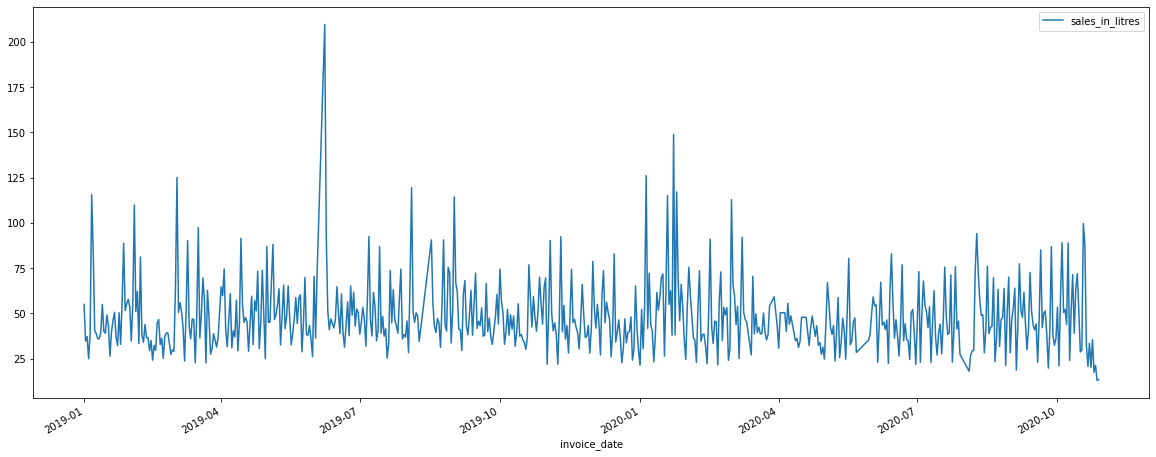

In [35]:
sales_df.groupby("invoice_date")[["sales_in_litres"]].mean().plot(figsize=(20,8));

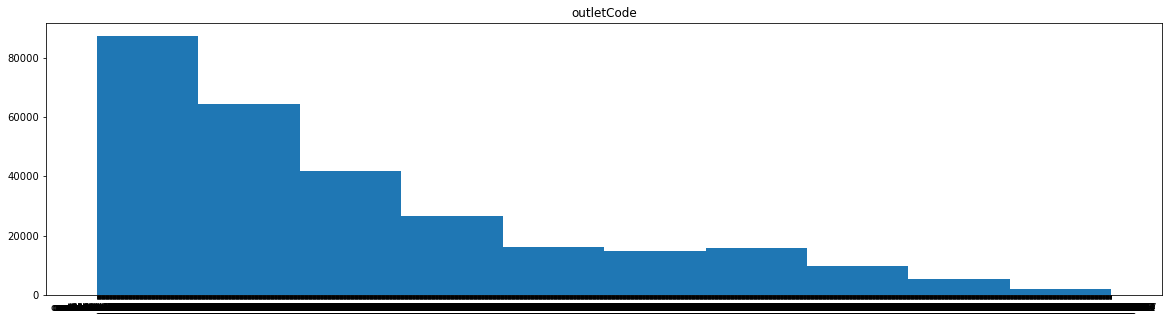

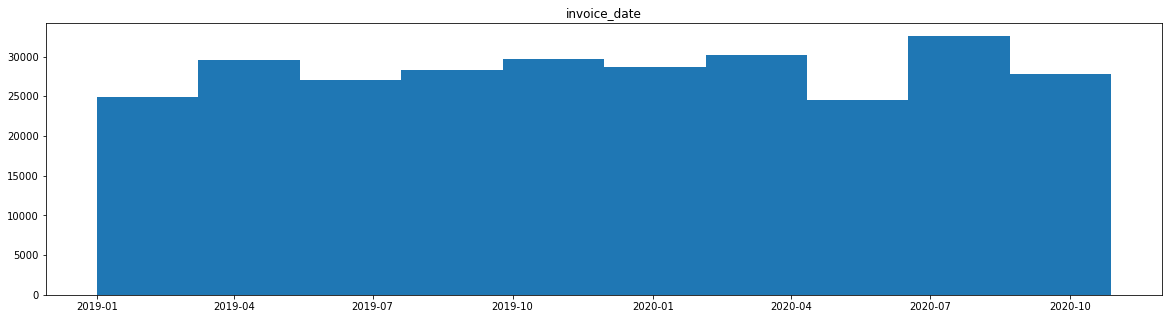

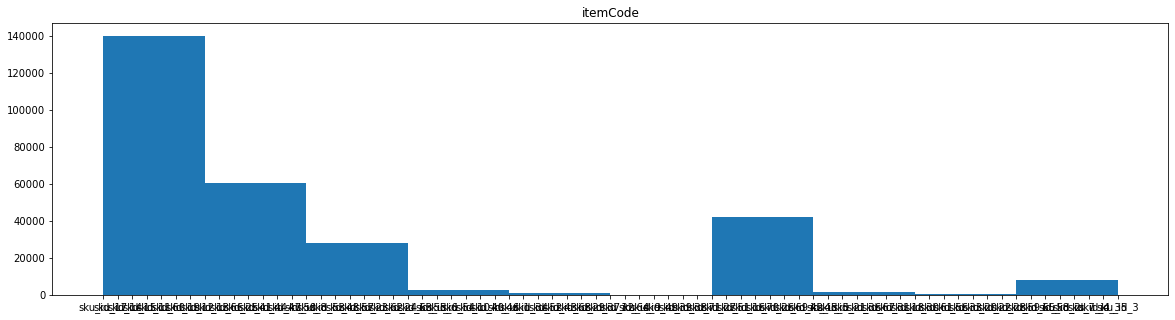

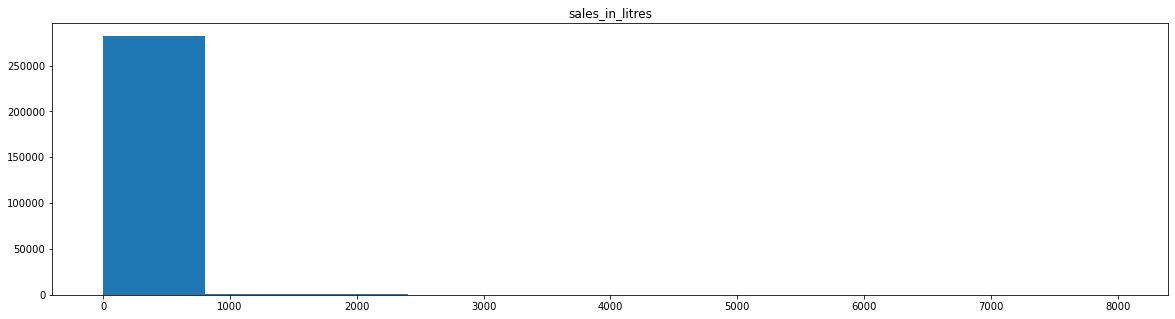

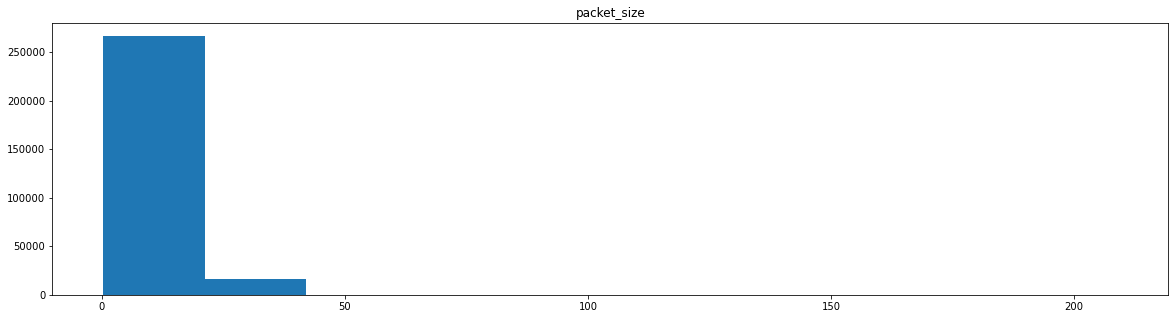

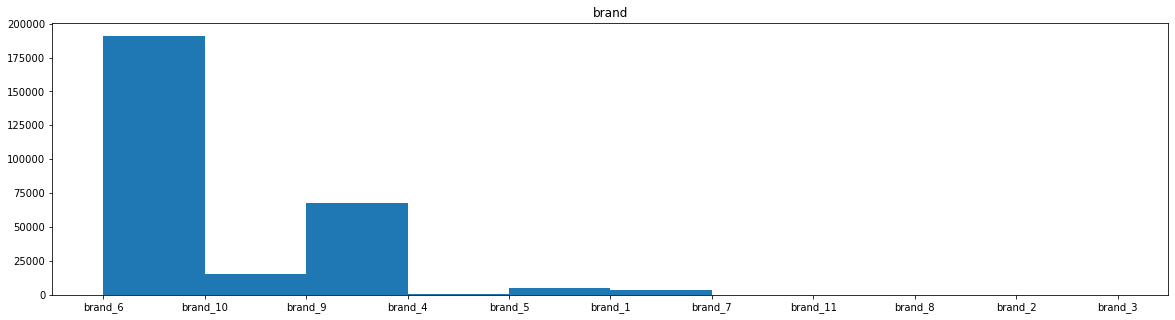

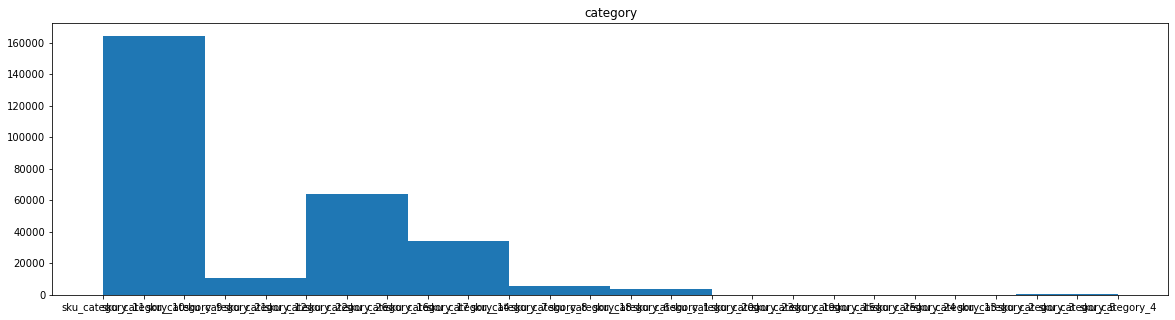

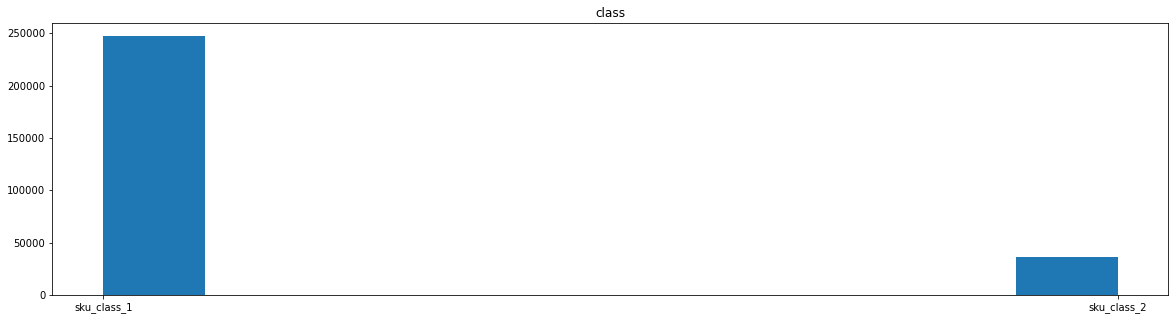

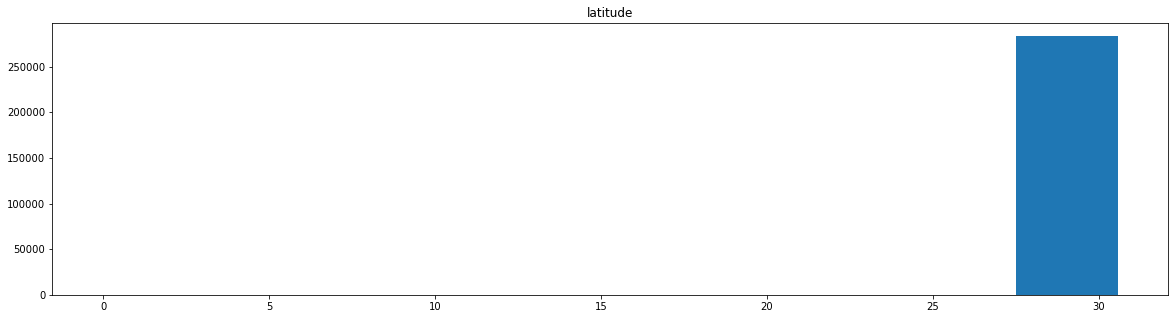

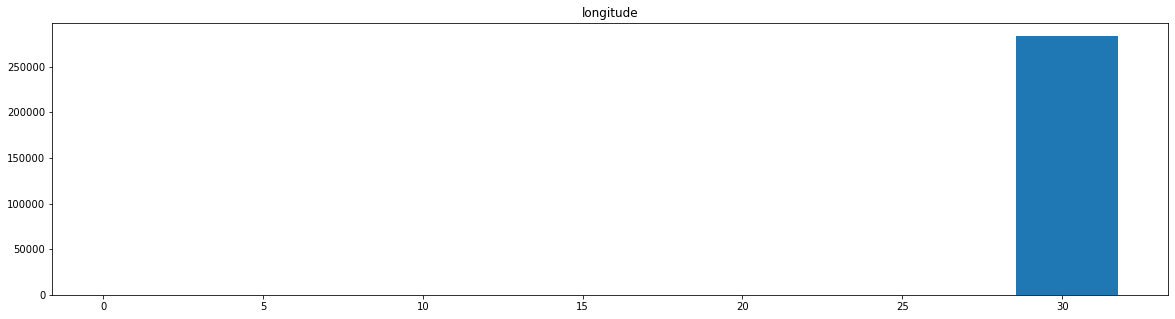

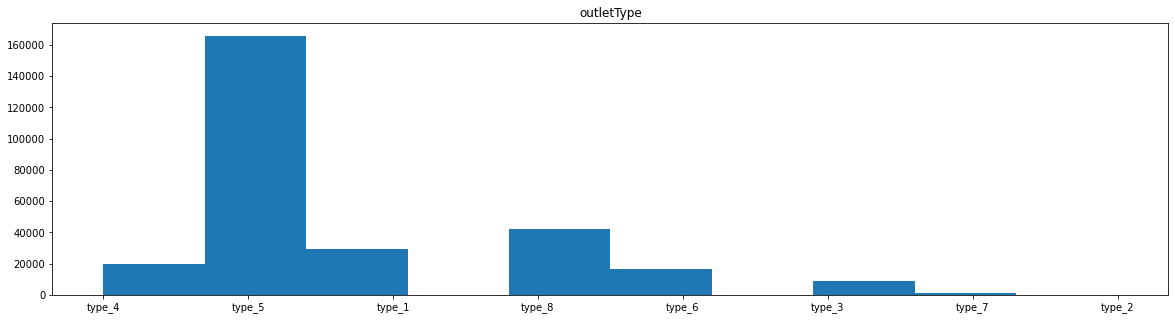

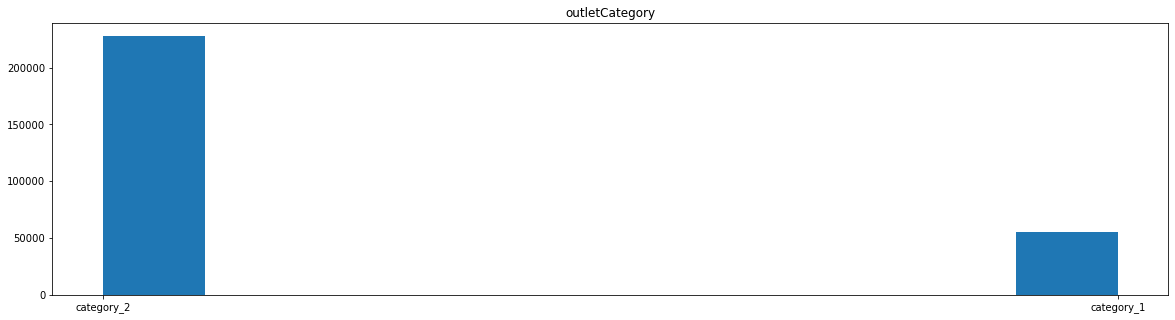

In [36]:
for i in sales_df.columns:
    plt.figure(figsize=(20, 5))
    plt.hist(sales_df[i])
    plt.title(i);

**Same Visualization in tabular format:**

In [37]:
for i in sales_df.columns:
    print(f"{i}:")
    print(sales_df[i].value_counts())
    print("-------------------------------------------------")

outletCode:
customer_id_2721    2435
customer_id_923     1703
customer_id_1636    1570
customer_id_361     1433
customer_id_2707    1374
                    ... 
customer_id_133        1
customer_id_386        1
customer_id_717        1
customer_id_455        1
customer_id_2648       1
Name: outletCode, Length: 2780, dtype: int64
-------------------------------------------------
invoice_date:
2020-08-10    861
2020-03-02    853
2019-10-19    809
2019-05-04    806
2020-07-29    792
             ... 
2019-06-08     87
2020-10-28     86
2020-10-25     60
2020-01-23     31
2019-02-17      7
Name: invoice_date, Length: 630, dtype: int64
-------------------------------------------------
itemCode:
sku_id_14    41118
sku_id_11    35627
sku_id_17    30155
sku_id_16    26397
sku_id_44    17908
             ...  
sku_id_22        1
sku_id_37        1
sku_id_30        1
sku_id_9         1
sku_id_3         1
Name: itemCode, Length: 71, dtype: int64
-------------------------------------------------


**Visualizing `sales_in_litres`**

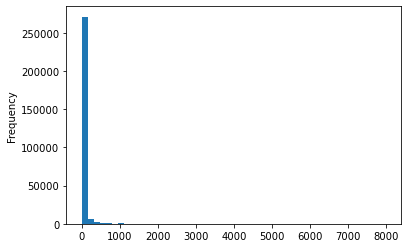

In [38]:
sales_df["sales_in_litres"].plot(kind='hist', bins=50);

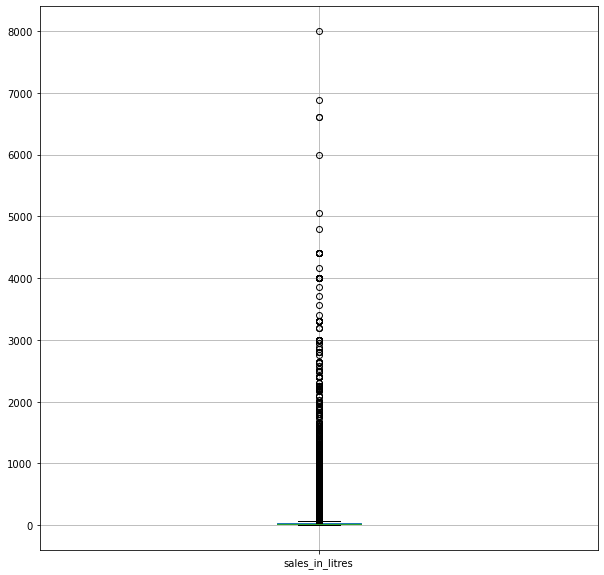

In [39]:
sales_df.boxplot("sales_in_litres", figsize=(10, 10));

### Since the data is skewed, looking for outliers..

In [40]:
# Identifing outliers
q1 = sales_df["sales_in_litres"].quantile(q=0.25)
q3 = sales_df["sales_in_litres"].quantile(q=.75)
iqr = q3-q1

In [41]:
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [42]:
outliers = sales_df[(sales_df["sales_in_litres"]<lower) | (sales_df["sales_in_litres"]>upper)]
outliers.shape, sales_df.shape

((37145, 12), (283545, 12))

In [43]:
print(f"percentage of oultiers: {(37145/283545)*100:.2f}%")

percentage of oultiers: 13.10%


### For now removing the outliers from the data set.

In [44]:
sales_df = sales_df[(sales_df["sales_in_litres"]>lower) & (sales_df["sales_in_litres"]<upper)]
sales_df.shape

(246079, 12)

**Visualizing `sales_in_litres` with respect to different columns**

**Also breaking the `invoice_date` column into `invoice_year`, `invoice_month`, `invoice_week`, and `invoice_day`.**

In [45]:
sales_df["invoice_year"] = sales_df["invoice_date"].dt.year
sales_df["invoice_month"] = sales_df["invoice_date"].dt.month
sales_df["invoice_week"] = sales_df["invoice_date"].dt.week
sales_df["invoice_day"] = sales_df["invoice_date"].dt.day

In [46]:
test_data["invoice_year"] = test_data["invoice_date"].dt.year
test_data["invoice_month"] = test_data["invoice_date"].dt.month
test_data["invoice_week"] = test_data["invoice_date"].dt.week
test_data["invoice_day"] = test_data["invoice_date"].dt.day

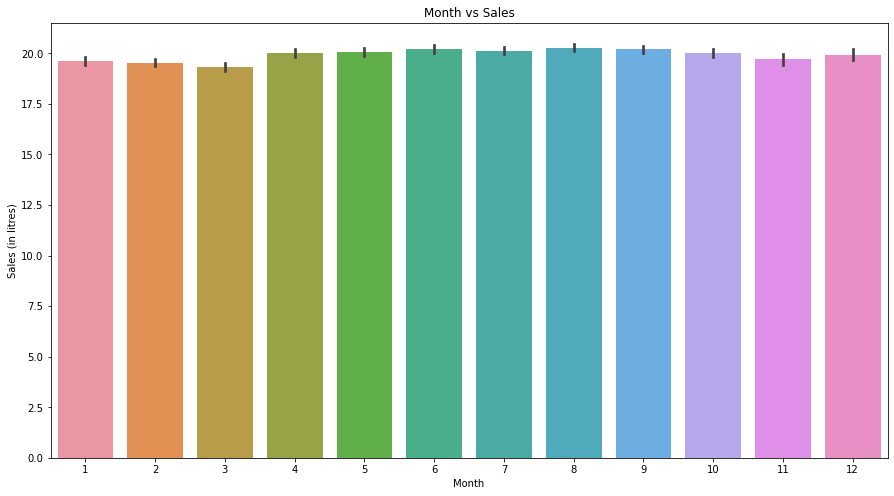

In [47]:
# Month vs Sales
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="invoice_month", y="sales_in_litres", data=sales_df)
ax.set(title="Month vs Sales",
       xlabel="Month",
       ylabel="Sales (in litres)");

In [48]:
pd.pivot_table(sales_df, columns=["invoice_month"], values=["sales_in_litres"]).T

,sales_in_litres
invoice_month,
1,19.642579
2,19.544130
3,19.330366
4,20.015822
5,20.063827
6,20.202809
7,20.129466
8,20.286536
9,20.196378


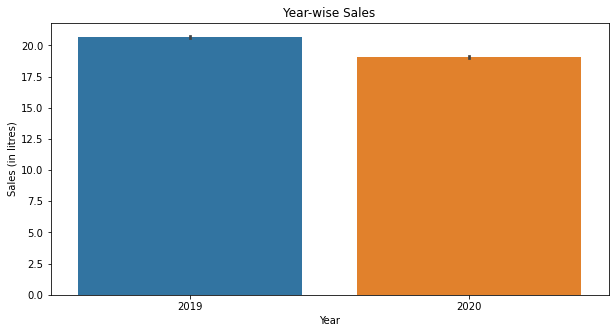

In [49]:
# year-wise Sales
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="invoice_year", y="sales_in_litres", data=sales_df)
ax.set(title="Year-wise Sales",
       xlabel="Year",
       ylabel="Sales (in litres)");

In [50]:
pd.pivot_table(sales_df, columns=["invoice_year"], values=["sales_in_litres"]).T

,sales_in_litres
invoice_year,
2019,20.682621
2020,19.080498


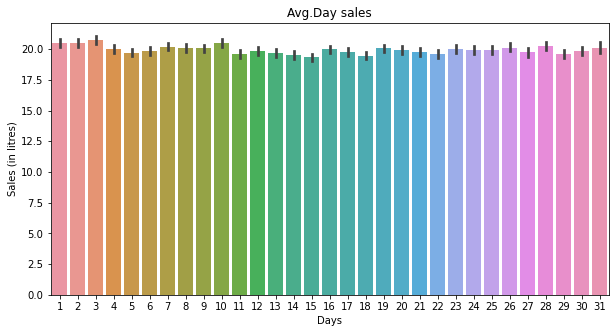

In [51]:
# Avg. Day sales
# year-wise Sales
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="invoice_day", y="sales_in_litres", data=sales_df)
ax.set(title="Avg.Day sales",
       xlabel="Days",
       ylabel="Sales (in litres)");

## Preparing training and test data.

In [52]:
sales_df.head()

,outletCode,invoice_date,itemCode,sales_in_litres,packet_size,brand,category,class,latitude,longitude,outletType,outletCategory,invoice_year,invoice_month,invoice_week,invoice_day
0,customer_id_2744,2019-01-01,sku_id_17,16.0,4.0,brand_6,sku_category_11,sku_class_1,30.148800,31.401400,type_4,category_2,2019,1,1,1
1,customer_id_1266,2019-01-01,sku_id_14,24.0,4.0,brand_6,sku_category_10,sku_class_1,30.119699,31.297300,type_5,category_2,2019,1,1,1
2,customer_id_766,2019-01-01,sku_id_15,5.0,1.0,brand_6,sku_category_11,sku_class_1,30.130199,31.357100,type_5,category_2,2019,1,1,1
3,customer_id_1999,2019-01-01,sku_id_11,12.0,1.0,brand_6,sku_category_9,sku_class_1,29.764400,31.299000,type_5,category_2,2019,1,1,1
4,customer_id_1048,2019-01-01,sku_id_60,12.0,1.0,brand_10,sku_category_21,sku_class_1,30.044100,31.366501,type_5,category_2,2019,1,1,1


In [53]:
data = sales_df.drop(["itemCode", "outletCode","invoice_date", "brand", "class"], axis=1)

In [54]:
data.columns

Index(['sales_in_litres', 'packet_size', 'category', 'latitude', 'longitude',
       'outletType', 'outletCategory', 'invoice_year', 'invoice_month',
       'invoice_week', 'invoice_day'],
      dtype='object')

In [55]:
model_data = pd.get_dummies(data, columns=["category", "outletType", "outletCategory"])

In [56]:
model_data.shape

(246079, 40)

In [57]:
# Training data
X_train = model_data.drop('sales_in_litres', axis=1)
y_train = model_data["sales_in_litres"]

In [58]:
# Test data
test_data.head()

,outletCode,invoice_date,itemCode,actual_sales_in_litres,packet_size,brand,category,class,latitude,longitude,outletType,outletCategory,invoice_year,invoice_month,invoice_week,invoice_day
0,customer_id_1552,2019-02-27,sku_id_44,30,5.0,brand_9,sku_category_16,sku_class_1,29.854200,31.229799,type_5,category_2,2019,2,9,27
1,customer_id_1552,2019-02-27,sku_id_12,16,4.0,brand_6,sku_category_9,sku_class_1,29.854200,31.229799,type_5,category_2,2019,2,9,27
2,customer_id_1552,2019-03-13,sku_id_44,45,5.0,brand_9,sku_category_16,sku_class_1,29.854200,31.229799,type_5,category_2,2019,3,11,13
3,customer_id_359,2019-03-23,sku_id_19,16,4.0,brand_6,sku_category_12,sku_class_2,29.912001,30.903799,type_3,category_2,2019,3,12,23
4,customer_id_1080,2019-04-01,sku_id_66,3,1.0,brand_10,sku_category_22,sku_class_1,29.987499,31.285400,type_6,category_2,2019,4,14,1


In [59]:
model_test_data = test_data.drop(["itemCode", "outletCode","invoice_date", "brand", "class"], axis=1)

In [60]:
model_test_data.columns

Index(['actual_sales_in_litres', 'packet_size', 'category', 'latitude',
       'longitude', 'outletType', 'outletCategory', 'invoice_year',
       'invoice_month', 'invoice_week', 'invoice_day'],
      dtype='object')

In [61]:
model_test_data = pd.get_dummies(model_test_data, columns=["category", "outletType", "outletCategory"])

In [62]:
X_test = model_test_data.drop("actual_sales_in_litres", axis=1)
y_test = model_test_data["actual_sales_in_litres"]

In [63]:
X_train.columns

Index(['packet_size', 'latitude', 'longitude', 'invoice_year', 'invoice_month',
       'invoice_week', 'invoice_day', 'category_sku_category_1',
       'category_sku_category_10', 'category_sku_category_11',
       'category_sku_category_12', 'category_sku_category_14',
       'category_sku_category_15', 'category_sku_category_16',
       'category_sku_category_17', 'category_sku_category_18',
       'category_sku_category_19', 'category_sku_category_2',
       'category_sku_category_20', 'category_sku_category_21',
       'category_sku_category_22', 'category_sku_category_24',
       'category_sku_category_25', 'category_sku_category_26',
       'category_sku_category_3', 'category_sku_category_6',
       'category_sku_category_7', 'category_sku_category_8',
       'category_sku_category_9', 'outletType_type_1', 'outletType_type_2',
       'outletType_type_3', 'outletType_type_4', 'outletType_type_5',
       'outletType_type_6', 'outletType_type_7', 'outletType_type_8',
       'outlet

In [64]:
X_test.columns

Index(['packet_size', 'latitude', 'longitude', 'invoice_year', 'invoice_month',
       'invoice_week', 'invoice_day', 'category_sku_category_1',
       'category_sku_category_10', 'category_sku_category_11',
       'category_sku_category_12', 'category_sku_category_14',
       'category_sku_category_16', 'category_sku_category_17',
       'category_sku_category_18', 'category_sku_category_2',
       'category_sku_category_20', 'category_sku_category_21',
       'category_sku_category_22', 'category_sku_category_23',
       'category_sku_category_26', 'category_sku_category_3',
       'category_sku_category_7', 'category_sku_category_8',
       'category_sku_category_9', 'outletType_type_1', 'outletType_type_2',
       'outletType_type_3', 'outletType_type_4', 'outletType_type_5',
       'outletType_type_6', 'outletType_type_7', 'outletType_type_8',
       'outletCategory_category_1', 'outletCategory_category_2'],
      dtype='object')

### Filling missing columns

In [65]:
X_train = X_train.assign(category_sku_category_23=0)

In [66]:
X_test = X_test.assign(category_sku_category_15=0)
X_test = X_test.assign(category_sku_category_19=0)
X_test = X_test.assign(category_sku_category_24=0)
X_test = X_test.assign(category_sku_category_25=0)
X_test = X_test.assign(category_sku_category_6=0)

In [67]:
X_train.shape, X_test.shape

((246079, 40), (11013, 40))

## Training the model

In [68]:
# Selecting model and fitting data into model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [69]:
lr.score(X_test, y_test)

-1.512261915486127e+21

In [70]:
y_pred = lr.predict(X_test)

In [71]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

476774025936.18286

### Selecting different model

In [72]:

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

rfr.score(X_test, y_test)

-0.0076122816250165926

In [73]:
y_pred = rfr.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

1.163660624962601

### NO model is giving +ve results

Have to modify the data

## Using only `model_data`

In [74]:
model_data_modified = sales_df.drop(["invoice_date","outletCode", "brand", "class"], axis=1)
model_data_modified.columns

Index(['itemCode', 'sales_in_litres', 'packet_size', 'category', 'latitude',
       'longitude', 'outletType', 'outletCategory', 'invoice_year',
       'invoice_month', 'invoice_week', 'invoice_day'],
      dtype='object')

In [75]:
model_data_modified = pd.get_dummies(model_data_modified, columns=["itemCode", "category", "outletType", "outletCategory"])

In [76]:
model_data_modified.shape

(246079, 97)

In [77]:
# Splsklearnarng X and y
X = model_data_modified.drop("sales_in_litres", axis=1)
y = model_data_modified["sales_in_litres"]

In [78]:
# Train and test data
from sklearn.model_selection import train_test_split
np.random.seed(117)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [79]:
# Selecting model and fitting data into model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

-2625815316521158.5

In [80]:
y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

119965.22025155119

### This also is not giving good results 😭😭😭😭...